# Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
df = pd.read_csv('2022_Car_Data_Cleaned.csv', index_col = [0])

In [3]:
df_n = df.select_dtypes(include = np.number)

In [4]:
df_n.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'fuel-type-diesel',
       'fuel-type-gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

### Overfitting or Underfitting Model
#### SLR can suffer from underfitting meanwhile overfitting is common in MLR and Polynomial Regression. Properly chosen models fits just fine.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Simple Linear Regression

In [6]:
xdata = df_n.drop('price', axis = 1)
ydata = df_n['price']

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.10, random_state = 1)

In [8]:
xtrain.shape, xtest.shape

((180, 20), (21, 20))

In [9]:
lm = LinearRegression()

In [10]:
lm.fit(xtrain[['horsepower']], ytrain)

LinearRegression()

In [11]:
yhat = lm.predict(xdata[['horsepower']])

In [12]:
yhat[0:4]

array([14602.89127786, 14602.89127786, 22035.21657084, 13047.28830956])

In [13]:
mean_squared_error(ydata,yhat)

21650922.33938237

In [14]:
r2_traindata =  lm.score(xtrain[['horsepower']],ytrain)
r2_testdata  =  lm.score(xtest[['horsepower']],ytest)
r2_totaldata =  lm.score(xdata[['horsepower']],ydata)

print(f"R-Squared for SLR :\nTrain Data : {r2_traindata} \nTest  Data : {r2_testdata} \nTotal Data : {r2_totaldata}")

R-Squared for SLR :
Train Data : 0.6621588065210514 
Test  Data : 0.3634554596325087 
Total Data : 0.6554686174047142


### Cross-Validation Score

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [16]:
lm2 = LinearRegression()

In [17]:
Rcross = cross_val_score(lm2, xdata[['horsepower']], ydata, cv = 4)

In [18]:
Rcross

array([0.7747254 , 0.51722436, 0.74881624, 0.04792707])

In [19]:
Rcross.mean(), Rcross.std()

(0.5221732664777984, 0.29158341973020163)

In [20]:
yhat2 = cross_val_predict(lm,xdata[['horsepower']],ydata,cv=4)
yhat2[0:4]

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ])

In [21]:
yhat2.shape

(201,)

In [22]:
mean_squared_error(ydata,yhat2)

23495641.533768874

In [23]:
r2_score(ydata,yhat2)

0.626113579102906

### Multiple Linear Regression

In [24]:
def DistributionPlot(Actual_value, Predicted_value, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.histplot(Actual_value,kde = True, color="r")
    ax2 = sns.histplot(Predicted_value,kde = True, color="b", ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(title='', loc='upper right', labels=['Actual Distribution', 'Predicted Distribution'])

    plt.show()
    plt.close()

In [25]:
lr_m  = LinearRegression()
lr_m.fit(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']], ytrain) 

LinearRegression()

In [26]:
r2_traindata_m  = lr_m.score(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']], ytrain)
r2_testdata_m = lr_m.score(xtest[['horsepower','curb-weight','engine-size','highway-L/100km']], ytest)
r2_totaldata_m = lr_m.score(xdata[['horsepower','curb-weight','engine-size','highway-L/100km']], ydata)

print(f"R-Squared for MLR :\nTrain Data : {r2_traindata_m} \nTest  Data : {r2_testdata_m} \nTotal Data : {r2_totaldata_m}")

R-Squared for MLR :
Train Data : 0.816884086465114 
Test  Data : 0.6086742248488661 
Total Data : 0.8115531950326966


In [27]:
yhat_train = lr_m.predict(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']])
yhat_test =  lr_m.predict(xtest[['horsepower','curb-weight','engine-size','highway-L/100km']])

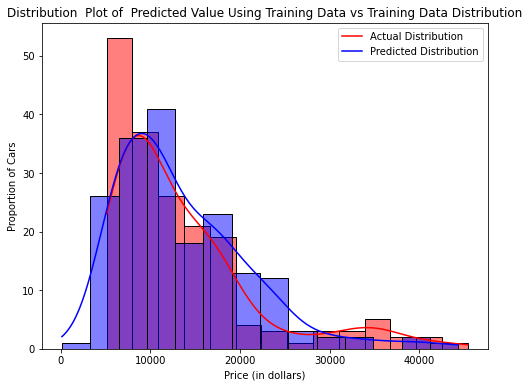

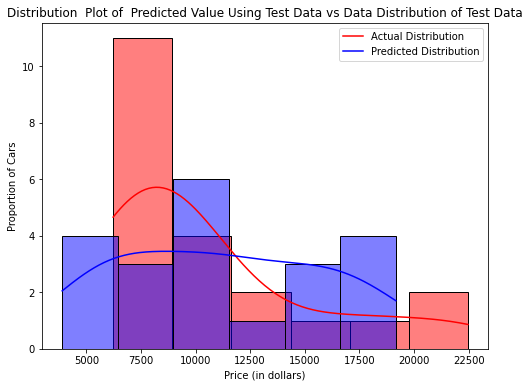

In [28]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(ytrain, yhat_train, Title)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest,yhat_test,Title)

### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
def PollyPlot( y_predict, y_actual):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    plt.plot( y_predict, 'ro', label='Predict Data')
    plt.plot( y_actual, 'go', label='Actual Data')
    plt.ylabel('Price')
    plt.ylim(0,100000)
    plt.legend()

In [31]:
xtrainp, xtestp, ytrainp, ytestp = train_test_split(xdata, ydata, test_size=0.45, random_state=0)

In [32]:
pr = PolynomialFeatures(degree=5)

xtrainp = pr.fit_transform(xtrainp[['horsepower']]) 

xtestp = pr.fit_transform(xtestp[['horsepower']])

pr

PolynomialFeatures(degree=5)

In [33]:
poly  = LinearRegression()

In [34]:
poly.fit(xtrainp,ytrainp)

LinearRegression()

In [35]:
yhatp = poly.predict(xtestp)

In [36]:
ytestp[0:4].values, yhatp[0:4]

(array([ 6295., 10698., 13860., 13499.]),
 array([ 6724.76865983,  7303.51351891, 12213.86164705, 18899.15221992]))

In [37]:
r2_trainp = poly.score(xtrainp,ytrainp)
r2_testp  = poly.score(xtestp,ytestp)

print(f"R-squared of Polynomial Regression :\nTrain Data :  {r2_trainp} \nTest Data  : {r2_testp}")

R-squared of Polynomial Regression :
Train Data :  0.5570463604063869 
Test Data  : -29.695406500540614


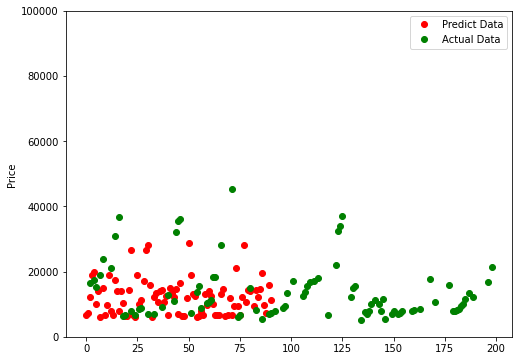

In [38]:
PollyPlot(yhatp, ytestp)

In [39]:
# R-squared for simple polynomial of varying degrees.
Rsq_test = []
order = [1, 2, 3, 4,5]

for n in order:
    
    xtrainp, xtestp, ytrainp, ytestp = train_test_split(xdata, ydata, test_size=0.45, random_state=0)
    
    pr = PolynomialFeatures(degree=n)
    
    lr = LinearRegression()
    
    x_train_pr = pr.fit_transform(xtrainp[['horsepower']])
    
    x_test_pr = pr.fit_transform(xtestp[['horsepower']])    
    
    lr.fit(x_train_pr, ytrainp)
    
    Rsq_test.append(lr.score(x_test_pr, ytestp))



In [40]:
print(Rsq_test)

[0.7326503621552396, 0.7405923858966474, 0.7406312304036828, 0.39976995542650295, -29.695406500540614]


### Multivariate Polynomial

In [41]:
pr2 = PolynomialFeatures(degree=2)

x_train_pr2 = pr2.fit_transform(xtrainp[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

x_test_pr2 = pr2.fit_transform(xtestp[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

multi_poly = LinearRegression().fit(x_train_pr2, ytrainp)

In [42]:
r2_trainp2 = multi_poly.score(x_train_pr2, ytrainp)
r2_testp2  = multi_poly.score(x_test_pr2, ytestp)

print(f"R-squared of Multivariate Polynomial Regression :\nTrain Data :  {r2_trainp2} \nTest Data  :  {r2_testp2}")

R-squared of Multivariate Polynomial Regression :
Train Data :  0.8581237048097113 
Test Data  :  0.5395299394453047


In [43]:
yhat_pr2 = multi_poly.predict(x_test_pr2)
yhat_pr2[0:4]

array([ 5885.62961655, 11343.24880602, 22260.05009409, 18881.30840463])

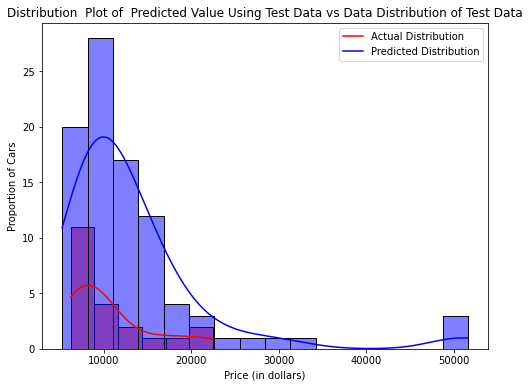

In [44]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest, yhat_pr2,Title)

### Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

In [46]:
pr = PolynomialFeatures(degree=2)
xtrainrr = pr.fit_transform(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km','normalized-losses','symboling']])
xtestrr =  pr.fit_transform(xtest[['horsepower','curb-weight','engine-size','highway-L/100km','normalized-losses','symboling']])

In [47]:
rr = Ridge(alpha=1)  # alpha = Regularization parameter

In [48]:
rr.fit(xtrainrr,ytrain)

Ridge(alpha=1)

In [49]:
yhat_rr = rr.predict(xtestrr)

In [50]:
yhat_rr[0:4], ytest[0:4].values

(array([10107.98809585,  7278.45898391, 10210.50854008,  5412.18759132]),
 array([ 9549.,  6229., 10245.,  7295.]))

In [51]:
r2_trainrr = rr.score(xtrainrr,ytrain)
r2_testrr  = rr.score(xtestrr,ytest)

print(f"R-squared of Ridge Regression :\nTrain Data :  {r2_trainrr} \nTest Data  : {r2_testrr}")

R-squared of Ridge Regression :
Train Data :  0.8709630961356578 
Test Data  : 0.719112055051813


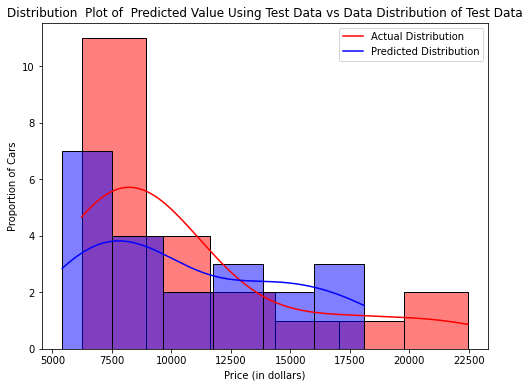

In [52]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest, yhat_rr,Title)

### Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

In [55]:
RR = Ridge()

In [56]:
Grid = GridSearchCV(RR,parameters,cv=4) #idd = None not recognized

In [57]:
Grid.fit(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], ydata)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [58]:
bestRR = Grid.best_estimator_

In [59]:
bestRR

Ridge(alpha=10000)

In [60]:
r2_RR =  bestRR.score(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], ydata)

print(f"R-squared of Best Ridge Regression on Total Data : {r2_RR}")

R-squared of Best Ridge Regression on Total Data : 0.8087836116843425


In [61]:
Yhat_RR =  bestRR.predict(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
Yhat_RR[0:4]

array([13782.44478858, 13782.44478858, 18910.4090164 , 10695.91749923])

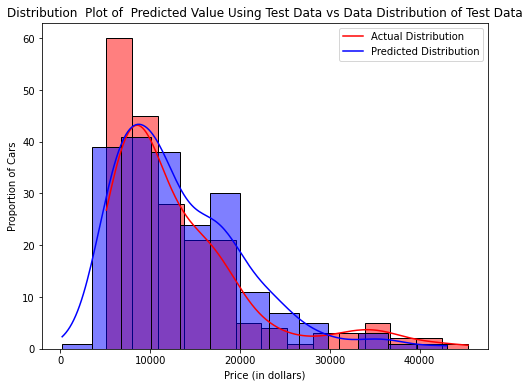

In [62]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ydata, Yhat_RR,Title)

In [63]:
print(f"R-Squared for SLR :\nTrain Data : {r2_traindata} \nTest  Data : {r2_testdata} \nTotal Data : {r2_totaldata}\n")

print(f"R-Squared for MLR :\nTrain Data : {r2_traindata_m} \nTest  Data : {r2_testdata_m} \nTotal Data : {r2_totaldata_m}\n")

print(f"R-squared of Polynomial Regression :\nTrain Data :  {r2_trainp} \nTest Data  : {r2_testp}\n")

print(f"R-squared of Multivariate Polynomial Regression :\nTrain Data :  {r2_trainp2} \nTest Data  :  {r2_testp2}\n")

print(f"R-squared of Ridge Regression :\nTrain Data :  {r2_trainrr} \nTest Data  : {r2_testrr}\n")

print(f"R-squared of Best Ridge Regression  :\nTotal Data : {r2_RR}\n")

R-Squared for SLR :
Train Data : 0.6621588065210514 
Test  Data : 0.3634554596325087 
Total Data : 0.6554686174047142

R-Squared for MLR :
Train Data : 0.816884086465114 
Test  Data : 0.6086742248488661 
Total Data : 0.8115531950326966

R-squared of Polynomial Regression :
Train Data :  0.5570463604063869 
Test Data  : -29.695406500540614

R-squared of Multivariate Polynomial Regression :
Train Data :  0.8581237048097113 
Test Data  :  0.5395299394453047

R-squared of Ridge Regression :
Train Data :  0.8709630961356578 
Test Data  : 0.719112055051813

R-squared of Best Ridge Regression  :
Total Data : 0.8087836116843425



#### In this particular notebook we cannot say which one of them is best predictor because we did not use different combination of features and Ridge regression model RR is trained with all data with cross validation. But still we can confirm that MLR is better than both SLR and Polynomial Regressions as it gives higher R-squared in both Train and Test Data, as SLE is underfitting and Polynomial model here is overfitting.

### Thank You